In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# API Key:        oBhymOuEXKbGu76iIuq02hrTI
# API Secret:     UdoYyBXi8Rve7sBdKk4GFl32JtQXO2lASR18vK1tLpKm4VNyhY

# Bearer Token:   AAAAAAAAAAAAAAAAAAAAACtrIAEAAAAAK8DKkuETaASMJlCitp3bXpt%2B6jQ%3DHU5uCuJQ7UCSHyw36kXVTcvk4fLhuaJR7Cqtyaf1EtSjYAo6Ev

# Access Token:   3364176047-r4GHEn0A7ofDhjMI7A4TIRDzdFcwmpCvtSOxr5B
# Access Secret:  DIp9IoiBeEYsyU8a8SDu3Pe5rxFnzyMmegcQeRLaLIc5K

In [4]:
import tweepy

In [5]:
df = pd.read_csv('senators.csv', encoding='ISO-8859-1')


In [6]:
df.head()


,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/17 21:47,We released bipartisan healthcare bill today &...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/17 18:48,I spoke with @Morning_Joe team abt #HonestAds ...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/17 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/17 18:04,"Today's the day @MarkWarner, @SenJohnMcCain &a...",https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/17 16:33,".@MarkWarner, @SenJohnMcCain &amp; I put toget...",https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288615 entries, 0 to 288614
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_at   288615 non-null  object
 1   text         288615 non-null  object
 2   url          288615 non-null  object
 3   replies      288615 non-null  int64 
 4   retweets     288615 non-null  int64 
 5   favorites    288615 non-null  int64 
 6   user         288615 non-null  object
 7   bioguide_id  288615 non-null  object
 8   party        288615 non-null  object
 9   state        288615 non-null  object
dtypes: int64(3), object(7)
memory usage: 22.0+ MB


In [8]:
df['party'].value_counts()

R    146278
D    136082
I      6255
Name: party, dtype: int64

<AxesSubplot: xlabel='party', ylabel='count'>

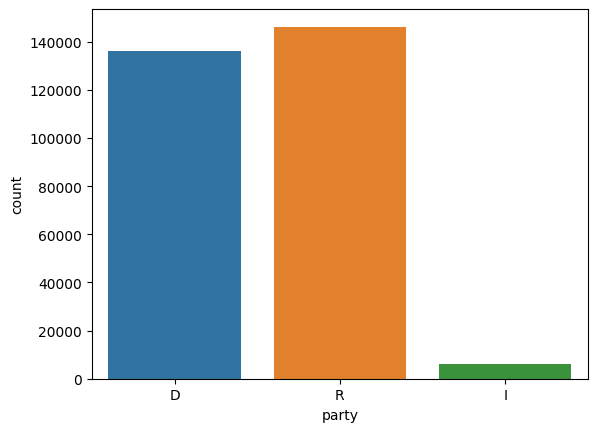

In [9]:
sns.countplot(data=df, x='party')

<AxesSubplot: >

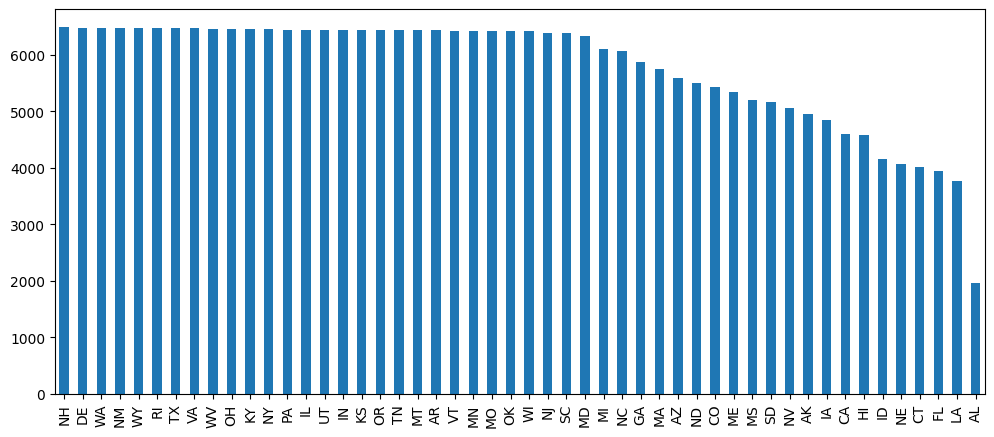

In [10]:
#Exploring the value counts by State
df['state'].value_counts()
df['state'].value_counts().plot(kind='bar',figsize=(12,5))

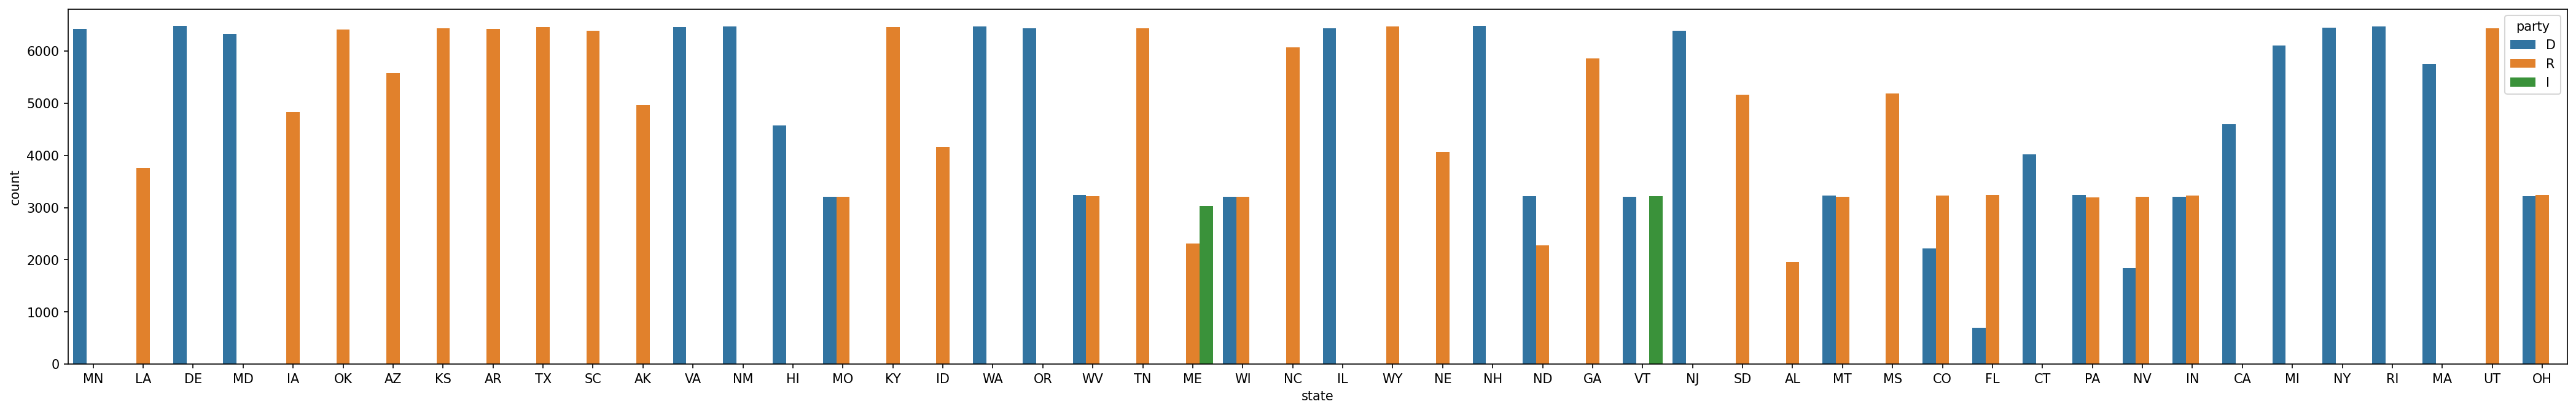

In [11]:
plt.figure(dpi=150,figsize=(35,5))
sns.countplot(data=df, x='state', hue='party');



Features and Label

For this, we want to get the raw data text for the analysis.

In [12]:
data = df[['party','text']]
data

,party,text
0,D,We released bipartisan healthcare bill today &...
1,D,I spoke with @Morning_Joe team abt #HonestAds ...
2,D,Lots of interest in my bill with Senators Warn...
3,D,"Today's the day @MarkWarner, @SenJohnMcCain &a..."
4,D,".@MarkWarner, @SenJohnMcCain &amp; I put toget..."
...,...,...
288610,D,Such a zone would allow the flow of unfettered...
288611,D,I welcome greater cooperation between the U.S....
288612,D,Educacií_n sobre la prevencií_n del abuso sexu...
288613,D,Education on sexual assault prevention should ...


In [13]:
X = data['text']
y = data['party']

Train test split

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
tfidf = TfidfVectorizer(stop_words = 'english')


In [18]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [19]:
X_train_tfidf

<173169x218850 sparse matrix of type '<class 'numpy.float64'>'
	with 2067827 stored elements in Compressed Sparse Row format>

Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC


Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

SVM

In [22]:
from sklearn.svm import SVC, LinearSVC

rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [23]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

Performance Evaluation

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 



# custom function
def report(model):
    pred = model.predict(X_test_tfidf)
    print(classification_report(y_test, pred, labels=np.unique(pred)))
    
    cm = confusion_matrix(y_test, pred, labels=np.unique(pred))
    disp = ConfusionMatrixDisplay(cm,display_labels=np.unique(pred))
    disp = disp.plot(cmap=plt.cm.Blues)
    #disp.ax_.set_title('Confusion Matrix')

    print(disp.confusion_matrix)



              precision    recall  f1-score   support

           D       0.83      0.84      0.83     54276
           R       0.83      0.86      0.85     58557

   micro avg       0.83      0.85      0.84    112833
   macro avg       0.83      0.85      0.84    112833
weighted avg       0.83      0.85      0.84    112833

[[45345  8931]
 [ 7941 50616]]


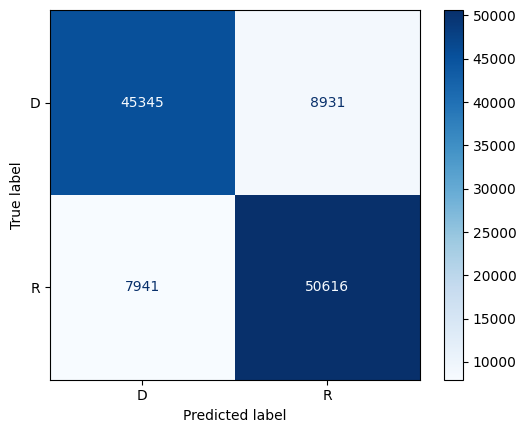

In [25]:
report(nb)

              precision    recall  f1-score   support

           D       0.84      0.83      0.84     54276
           I       0.80      0.28      0.42      2613
           R       0.84      0.87      0.86     58557

    accuracy                           0.84    115446
   macro avg       0.83      0.66      0.70    115446
weighted avg       0.84      0.84      0.84    115446

[[45181    66  9029]
 [ 1161   741   711]
 [ 7422   117 51018]]


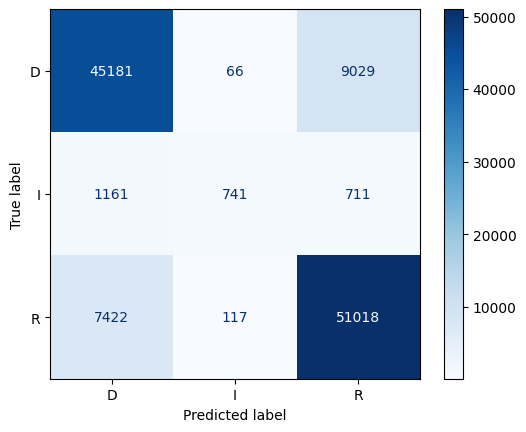

In [26]:
report(log_model)

              precision    recall  f1-score   support

           D       0.85      0.84      0.84     54276
           I       0.80      0.26      0.40      2613
           R       0.85      0.88      0.86     58557

    accuracy                           0.85    115446
   macro avg       0.83      0.66      0.70    115446
weighted avg       0.85      0.85      0.84    115446

[[45428    44  8804]
 [ 1279   691   643]
 [ 6669   129 51759]]


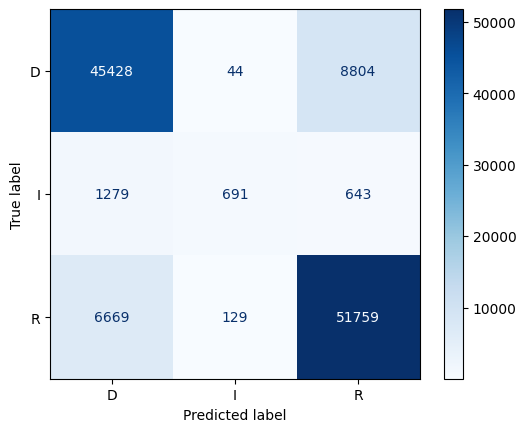

In [27]:
report(rbf_svc)

In [ ]:
report(linear_svc)

Finalizing a PipeLine for Deployment on New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [28]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scv', LinearSVC()),
])

# fit on entire data
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('scv', LinearSVC())])

In [29]:
new_tweet = ['RT @ProtectWinters: @SenAngusKing visits @mtabramskiarea, sees solar array and announces biomass tax incentive legislation: http://t.co/Wokäó_']
pipe.predict(new_tweet)

array(['I'], dtype=object)

In [30]:
new_tweet = ['Talking with @wolfblitzer now on @CNNSitRoom - tune in https://t.co/U4pg3pAaOr']
pipe.predict(new_tweet)

array(['D'], dtype=object)

In [31]:
new_tweet = ['How could the Obama administration pay #Iran $1.7 billion out of a fund that should already be depleted? https://t.co/rvVeoEQVfL']
pipe.predict(new_tweet)

array(['R'], dtype=object)

In [32]:
new_tweet = ['#Obamacare is giving us higher premiums and canceled policies -- much bigger problem than the website. #trainwreck']
pipe.predict(new_tweet)

array(['R'], dtype=object)

In [33]:
new_tweet = ['#SCOTUS should strike down TX law that makes it much more difficult for women to make their own health care choices. https://t.co/EAqwVmeNvGk']
pipe.predict(new_tweet)

array(['D'], dtype=object)

In [34]:
new_tweet = ['Joe Biden and Nancy Pelosi’s trillion-dollar spending spree has ruined our economy. It’s time to get America back on track!']
pipe.predict(new_tweet)

array(['R'], dtype=object)

In [35]:
new_tweet = ['This morning, we assembled holiday food boxes for Arizona families in need at @UnitedFoodBank']
pipe.predict(new_tweet)

array(['R'], dtype=object)

In [36]:
# Authenticate with Twitter OAuth 1.0a User Context
auth = tweepy.OAuth1UserHandler(
   "oBhymOuEXKbGu76iIuq02hrTI",                                           # API / Consumer Key here
   "UdoYyBXi8Rve7sBdKk4GFl32JtQXO2lASR18vK1tLpKm4VNyhY",                  # API / Consumer Secret here
   "3364176047-r4GHEn0A7ofDhjMI7A4TIRDzdFcwmpCvtSOxr5B",                  # Access Token here
   "DIp9IoiBeEYsyU8a8SDu3Pe5rxFnzyMmegcQeRLaLIc5K"                        # Access Token Secret here
)
api = tweepy.API(auth)

In [37]:
# Authenticate with Twitter OAuth 2.0 Bearer Token (Application-only)
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAACtrIAEAAAAAK8DKkuETaASMJlCitp3bXpt%2B6jQ%3DHU5uCuJQ7UCSHyw36kXVTcvk4fLhuaJR7Cqtyaf1EtSjYAo6Ev')

In [38]:
# Pull tweets from twitter

query = '#Obamacare -is:retweet lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=10)

# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

In [39]:
for tweet in tweets.data:
    analysis = pipe.predict(tweet)
    print('\n**Tweet Text**\n',tweet.text)
    print(analysis,'\n')


**Tweet Text**
 Yup but there’s die hards who are Obama Crazy lol #Obamasucks #MichaelObama #obamacare https://t.co/Zuga59GcJb
['R' 'R' 'R' 'R' 'R'] 


**Tweet Text**
 More medical insurance drama, it should not be this difficult or expensive to get freaking medical insurance.
#bluecrossblueshield #medicalinsurance #Obamacare #ACA https://t.co/1MRIE3cBd4
['R' 'R' 'R' 'R' 'R'] 


**Tweet Text**
 😮➡️
https://t.co/BSVwluOWWd
Shop ACA Health insurance
HEALTH INSURANCE + DENTAL/VISION
😮➡️
#marketplace #healthinsurance #obamacare #acaplans #acainsurance #subcidizedplans #insurance #openenrollment
['R' 'R' 'R' 'R' 'R'] 


**Tweet Text**
 @PramilaJayapal I do not agree. Here's why: Government has already shown how they cannot manage the larger healthcare marketplace. Need I mention the abject failure of #Obamacare?
['R' 'R' 'R' 'R' 'R'] 


**Tweet Text**
 Gabby Quinteros Sucks And Fucks Doctor. Awesome. Gabby Quinteros tits are amazing. And to think #Republicans want to get rid of #Obamacare.

In [40]:
import tensorflow as tp
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['text'][0]))


Original tweet -> We released bipartisan healthcare bill today &amp; Iäó»ll keep working to get this done. https://t.co/WMr8pnA4PP

Processed tweet -> ['releas', 'bipartisan', 'healthcar', 'bill', 'today', 'amp', 'keep', 'work', 'get', 'done', 'http', 'co', 'wmr8pna4pp']


In [42]:
len(df['text'])

288615

In [43]:
from sklearn.preprocessing import LabelEncoder

# Apply data processing to each tweet
X = list(map(tweet_to_words, df['text']))

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['party'])

In [44]:
print(X[0])
print(Y[0])

['releas', 'bipartisan', 'healthcar', 'bill', 'today', 'amp', 'keep', 'work', 'get', 'done', 'http', 'co', 'wmr8pna4pp']
0


In [45]:
y = pd.get_dummies(df['party'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

C:\Users\zohai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [47]:
# print first 200 words/tokens
#print(count_vector.get_feature_names[0:200])

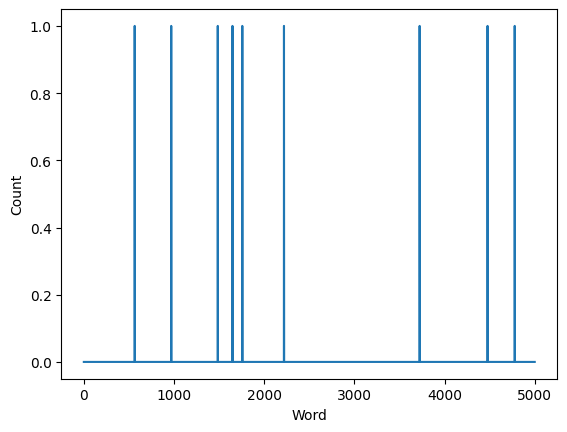

In [48]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [49]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][0])
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 We released bipartisan healthcare bill today &amp; Iäó»ll keep working to get this done. https://t.co/WMr8pnA4PP
After Tokenization & Padding 
 [  21 1395  104  223   37   23    9  680  127  103    3  108   20  530
    5    1    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [50]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [51]:
y = pd.get_dummies(df['party'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (173169, 50) (173169, 3)
Validation Set -> (57723, 50) (57723, 3)
Test Set -> (57723, 50) (57723, 3)


In [52]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [53]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

C:\Users\zohai\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


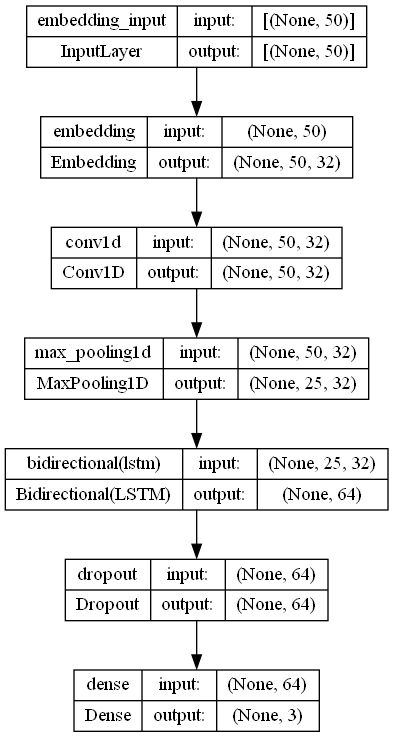

In [54]:
tp.keras.utils.plot_model(model, show_shapes=True)

In [55]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [56]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7947
Precision : 0.8003
Recall    : 0.7853
F1 Score  : 0.7928


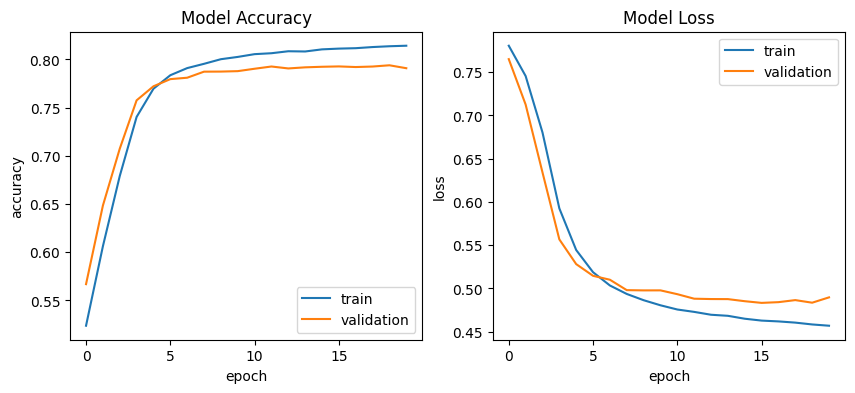

In [57]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1804/1804 [==============================] - 5s 2ms/step


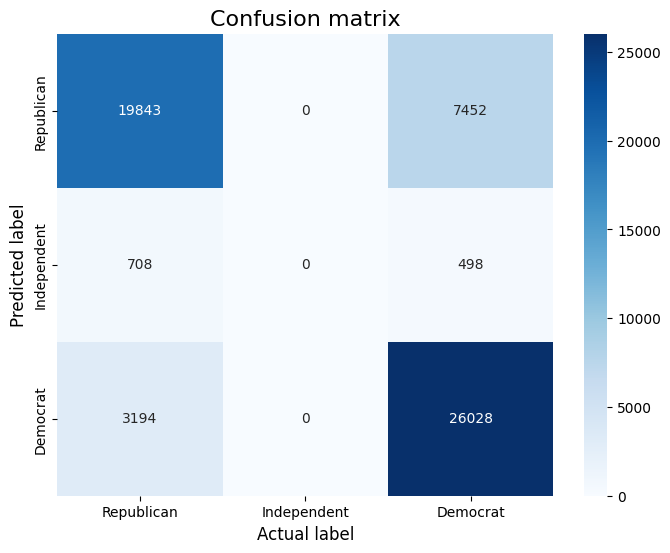

In [58]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_parties = ['Republican', 'Independent', 'Democrat']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_parties,
                yticklabels=sentiment_parties)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [59]:
# Save the model architecture & the weights
model.save('lstm_model.h5')
print('LSTM model saved')

Best model saved


In [60]:
from keras.models import load_model

# Load model
model = load_model('lstm_model.h5')

def predict_tweet(text):
    '''Function to predict political party of the passed tweet'''
    
    sentiment_parties = ['Republican', 'Independent', 'Democrat']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted political party is', sentiment_parties[yt[0]])

In [62]:
predict_tweet(["The left relies on silencing their opposition because they know their ideas don't stand a chance against Conservative values"])

1/1 [==============================] - 0s 14ms/step
The predicted sentiment is Democrat


In [63]:
predict_tweet(["Twitter was founded as primarily an engineering platform. But over time, the company culture began to change more towards 'doing good in the world' - in other words, doing the Left's bidding."])

1/1 [==============================] - 0s 15ms/step
The predicted sentiment is Republican
